In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# <h1>Data PreProcessing</h1>

In [12]:
dataset = [train,test]

In [13]:
for data in dataset:
    data.drop(['Loan_ID'],axis=1,inplace=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [15]:
## when you train your model ..the accuracy will be different if the loanID is notdropped


In [16]:
## filling null values for numeric value for mean 

In [17]:
dataset=[train,test]
for data in dataset:
    data['LoanAmount']= data['LoanAmount'].fillna(data['LoanAmount'].mean())
    data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
    

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [19]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [20]:
# value counts for credit history for train dataset

In [21]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [23]:
dataset = [train,test]
for data in dataset:
    data['Gender'].ffill(inplace=True)
    data['Married'].ffill(inplace=True)
    data['Dependents'].bfill(inplace=True)
    data['Self_Employed'].ffill(inplace=True)
    data['Credit_History'].ffill(inplace=True)

In [24]:
train['Credit_History'].value_counts()

1.0    513
0.0    101
Name: Credit_History, dtype: int64

In [25]:
print(train['Gender'].value_counts())
print(train['Married'].value_counts())
print(train['Self_Employed'].value_counts())
print(train['Dependents'].value_counts())

Male      500
Female    114
Name: Gender, dtype: int64
Yes    400
No     214
Name: Married, dtype: int64
No     528
Yes     86
Name: Self_Employed, dtype: int64
0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64


<h1>Preprocessing The Dataset</h1>

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [27]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


<h2 style="color:red;">Correlation and univariate analysis</h2>

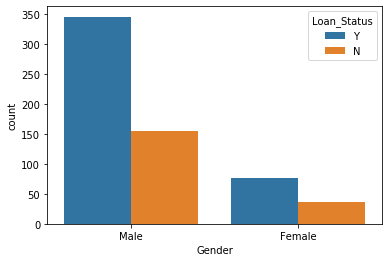

In [29]:
# count observation of gender and loan status is displayed
sns.countplot(train['Gender'],hue=train['Loan_Status'])

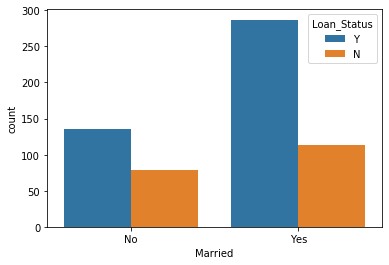

In [30]:
sns.countplot(train['Married'],hue=train['Loan_Status'])

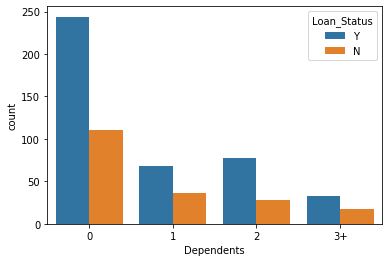

In [31]:
sns.countplot(train['Dependents'],hue=train['Loan_Status'])

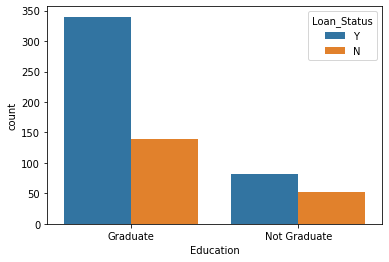

In [32]:
sns.countplot(train['Education'],hue=train['Loan_Status'])

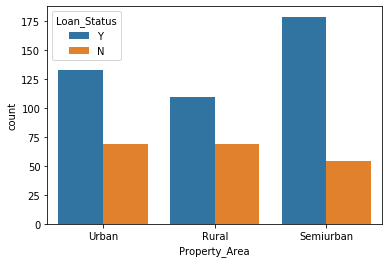

In [33]:
sns.countplot(train['Property_Area'],hue=train['Loan_Status'])

In [34]:
# numerical attributes or column visualization using distplot for ApplicantIncome attribute

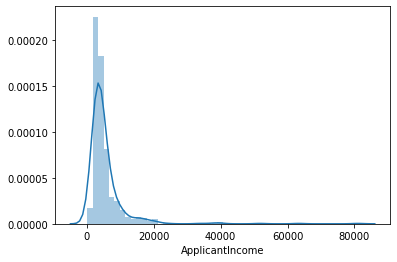

In [35]:
sns.distplot(train['ApplicantIncome'])

In [36]:
## lot of skweness towards left side..we need to achieve normal distribution for ApplicantIncome

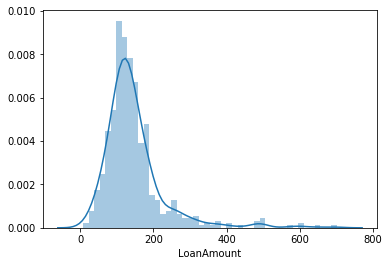

In [37]:
sns.distplot(train['LoanAmount'])

In [38]:
## lot of skweness towards left side..we need to achieve normal distribution for LoanAmount

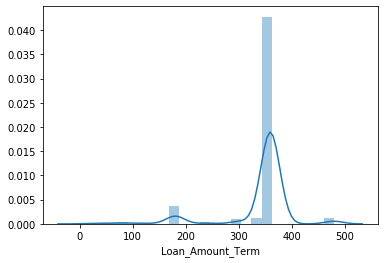

In [39]:
sns.distplot(train['Loan_Amount_Term'])

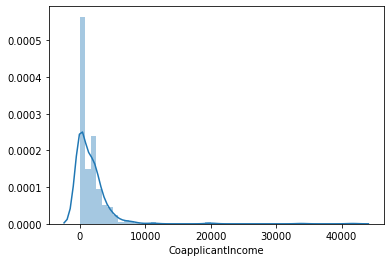

In [40]:
sns.distplot(train['CoapplicantIncome'])

In [41]:
## we cannot train the data with this skewness in dataset

In [42]:
## So we need to make the skewness into normal distribution by using logarithmic function for all the variables which are skewed

In [43]:
dataset=[train,test]
for data in dataset:
    data['ApplicantIncome']=np.log(data['ApplicantIncome'])
    data['LoanAmount']=np.log(data['LoanAmount'])
    data['Loan_Amount_Term']=np.log(data['Loan_Amount_Term'])
    data['CoapplicantIncome']=np.log(data['CoapplicantIncome'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


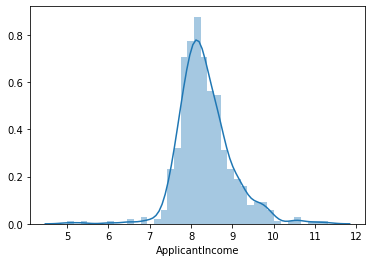

In [44]:
sns.distplot(train['ApplicantIncome'])

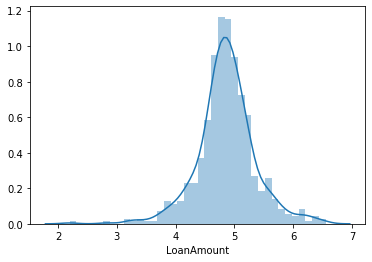

In [45]:
sns.distplot(train['LoanAmount'])

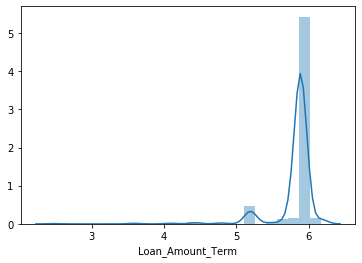

In [46]:
sns.distplot(train['Loan_Amount_Term'])

In [47]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.341213,-inf,4.862066,5.802065,0.835505
std,0.645263,NaN,0.496575,0.312482,0.371027
min,5.010635,-inf,2.197225,2.484907,0.000000
25%,7.964677,-inf,4.607658,5.886104,1.000000
50%,8.246040,7.080284,4.859812,5.886104,1.000000
75%,8.664750,7.739462,5.104426,5.886104,1.000000
max,11.302204,10.637465,6.551080,6.173786,1.000000


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [49]:
# as we can see there are some infinite values in the variable CoapplicantIncome ..so we are goint to drop that variable

In [50]:
train.drop(['CoapplicantIncome'],inplace=True,axis=1)
test.drop(['CoapplicantIncome'],inplace=True,axis=1)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender              614 non-null object
Married             614 non-null object
Dependents          614 non-null object
Education           614 non-null object
Self_Employed       614 non-null object
ApplicantIncome     614 non-null float64
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Credit_History      614 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null object
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
Gender              367 non-null object
Married             367 non-null object
Dependents          367 non-null object
Education           367 non-null object
Self_Employed       367 non-null object
ApplicantIncome     367 non-null float64
LoanAmount          367 non-null float64
Loan_Amount_Term    367 non-null float64
Credit_History      367 non-null float64
Property_Area       367 non-null object
dtypes: float64(4), object(6)
memory usage: 28.8+ KB


<h3 style="color:blue;">Correlation</h3>

(4.0, 0.0)

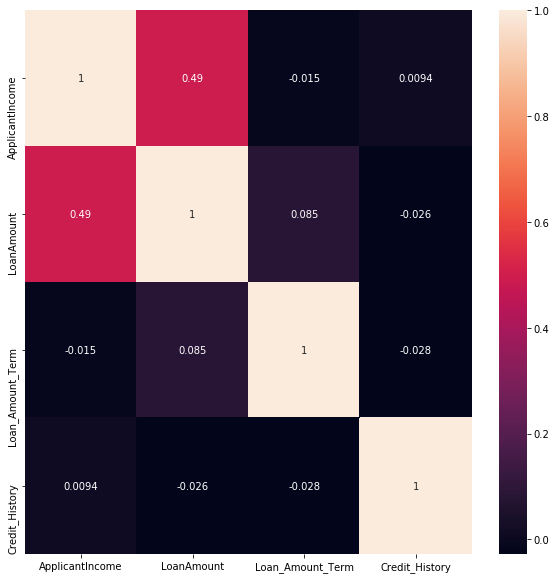

In [53]:
corr=train.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=corr,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<h3 style="color:blue;">Label Encoding</h3>

In [54]:
from sklearn.preprocessing import LabelEncoder
columns=['Gender','Dependents','Married','Self_Employed','Property_Area','Education']
le=LabelEncoder()
dataset=[train,test]

In [55]:
columns

['Gender',
 'Dependents',
 'Married',
 'Self_Employed',
 'Property_Area',
 'Education']

In [56]:
train['Married'].dtypes

dtype('O')

In [57]:
test['Married'].dtypes

dtype('O')

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender              614 non-null object
Married             614 non-null object
Dependents          614 non-null object
Education           614 non-null object
Self_Employed       614 non-null object
ApplicantIncome     614 non-null float64
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Credit_History      614 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null object
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
Gender              367 non-null object
Married             367 non-null object
Dependents          367 non-null object
Education           367 non-null object
Self_Employed       367 non-null object
ApplicantIncome     367 non-null float64
LoanAmount          367 non-null float64
Loan_Amount_Term    367 non-null float64
Credit_History      367 non-null float64
Property_Area       367 non-null object
dtypes: float64(4), object(6)
memory usage: 28.8+ KB


In [60]:
  for c in columns:
        f = test[c].unique()
        print(f)
        g = train[c].unique()
        print(g)

['Male' 'Female']
['Male' 'Female']
['0' '1' '2' '3+']
['0' '1' '2' '3+']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Urban' 'Semiurban' 'Rural']
['Urban' 'Rural' 'Semiurban']
['Graduate' 'Not Graduate']
['Graduate' 'Not Graduate']


In [61]:
train[['Gender','Dependents','Married','Self_Employed','Property_Area','Education']]

,Gender,Dependents,Married,Self_Employed,Property_Area,Education
0,Male,0,No,No,Urban,Graduate
1,Male,1,Yes,No,Rural,Graduate
2,Male,0,Yes,Yes,Urban,Graduate
3,Male,0,Yes,No,Urban,Not Graduate
4,Male,0,No,No,Urban,Graduate
...,...,...,...,...,...,...
609,Female,0,No,No,Rural,Graduate
610,Male,3+,Yes,No,Rural,Graduate
611,Male,1,Yes,No,Urban,Graduate
612,Male,2,Yes,No,Urban,Graduate


In [62]:
for data in dataset:
    for c in columns:
        data[c]=le.fit_transform(data[c])

In [63]:
## as we dont have dependent value in test dataset we are encoding it seperately

train['Loan_Status']=le.fit_transform(train['Loan_Status'])

In [64]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,4.986426,5.886104,1.0,2,1
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,1
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,1
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1.0,0,1
610,1,1,3,0,0,8.320205,3.688879,5.192957,1.0,0,1
611,1,1,1,0,0,8.996157,5.533389,5.886104,1.0,2,1
612,1,1,2,0,0,8.933664,5.231109,5.886104,1.0,2,1


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender              614 non-null int64
Married             614 non-null int64
Dependents          614 non-null int64
Education           614 non-null int64
Self_Employed       614 non-null int64
ApplicantIncome     614 non-null float64
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Credit_History      614 non-null float64
Property_Area       614 non-null int64
Loan_Status         614 non-null int64
dtypes: float64(4), int64(7)
memory usage: 52.9 KB


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
Gender              367 non-null int64
Married             367 non-null int64
Dependents          367 non-null int64
Education           367 non-null int64
Self_Employed       367 non-null int64
ApplicantIncome     367 non-null float64
LoanAmount          367 non-null float64
Loan_Amount_Term    367 non-null float64
Credit_History      367 non-null float64
Property_Area       367 non-null int64
dtypes: float64(4), int64(6)
memory usage: 28.8 KB


In [68]:
train['Credit_History']=train['Credit_History'].astype(dtype='Int64')
test['Credit_History']=test['Credit_History'].astype(dtype='Int64')

In [69]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,4.986426,5.886104,1,2,1
1,1,1,1,0,0,8.430109,4.852030,5.886104,1,0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1,2,1
3,1,1,0,1,0,7.856707,4.787492,5.886104,1,2,1
4,1,0,0,0,0,8.699515,4.948760,5.886104,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,5.886104,1,0,1
610,1,1,3,0,0,8.320205,3.688879,5.192957,1,0,1
611,1,1,1,0,0,8.996157,5.533389,5.886104,1,2,1
612,1,1,2,0,0,8.933664,5.231109,5.886104,1,2,1


In [70]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,8.651724,4.700480,5.886104,1,2
1,1,1,1,0,0,8.031385,4.836282,5.886104,1,2
2,1,1,2,0,0,8.517193,5.337538,5.886104,1,2
3,1,1,2,0,0,7.757906,4.605170,5.886104,1,2
4,1,0,0,1,0,8.094378,4.356709,5.886104,1,2
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,8.296297,4.727388,5.886104,1,2
363,1,1,0,0,0,8.332789,4.744932,5.886104,1,2
364,1,0,0,0,0,8.086410,4.836282,5.886104,1,1
365,1,1,0,0,0,8.517193,5.062595,5.886104,1,0


<h1 style="color:red;">Train-Test Split</h1>

In [72]:
x = train.iloc[:,0:10].values

In [90]:
y = train.iloc[:,10].values

In [92]:
len(y)

614

In [77]:
test.loc[test['ApplicantIncome']== -np.inf]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,1,0,0,0,0,-inf,4.997212,5.886104,0,0
116,0,0,0,1,0,-inf,5.192957,5.886104,1,1


<h3 style="color:blue;">Replacing inf values with nan</h3>

In [78]:
test.replace([np.inf, -np.inf],np.nan,inplace=True)

In [79]:
test.dropna(inplace=True)

In [94]:
test.values

array([[1, 1, 0, ..., 5.886104031450156, 1, 2],
       [1, 1, 1, ..., 5.886104031450156, 1, 2],
       [1, 1, 2, ..., 5.886104031450156, 1, 2],
       ...,
       [1, 0, 0, ..., 5.886104031450156, 1, 1],
       [1, 1, 0, ..., 5.886104031450156, 1, 0],
       [1, 0, 0, ..., 5.19295685089021, 1, 0]], dtype=object)

In [95]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,8.651724,4.700480,5.886104,1,2
1,1,1,1,0,0,8.031385,4.836282,5.886104,1,2
2,1,1,2,0,0,8.517193,5.337538,5.886104,1,2
3,1,1,2,0,0,7.757906,4.605170,5.886104,1,2
4,1,0,0,1,0,8.094378,4.356709,5.886104,1,2
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,8.296297,4.727388,5.886104,1,2
363,1,1,0,0,0,8.332789,4.744932,5.886104,1,2
364,1,0,0,0,0,8.086410,4.836282,5.886104,1,1
365,1,1,0,0,0,8.517193,5.062595,5.886104,1,0


<h1 style="color:red;">Model Training</h1>

In [80]:
# Logistic regression is a classification algorithm,
#used when the value of the target variable is catagorical in nature
#Logistic Regression is most commonly used when the data in the output has binary output
#so when it belongs to one class or the other or it is 0 or 1

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [81]:
#checking the accuracy for the Logistic Regression
logreg = LogisticRegression()
logreg.fit(x,y)
Y_pred = logreg.predict(test.values)#predicting values for the test dataset
acc_log = round(logreg.score(x,y)*100,2)
print(round(acc_log,2),"%")

80.62 %


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
acc_log = (logreg.score(x,y))
print(acc_log)

0.8061889250814332


In [83]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [84]:
logreg = LogisticRegression()
logreg.fit(x,y)
Y_pred = logreg.predict(test.values)
logreg.score(x,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8061889250814332

In [98]:
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

Y_Pred=knn.predict(x)

acc_knn = round(knn.score(x,y)*100,2)
print(round(acc_knn,2), "%")

81.27 %


In [101]:
from sklearn.metrics import classification_report
print("Classification Report:",classification_report(y,Y_Pred))

Classification Report:               precision    recall  f1-score   support

           0       0.82      0.51      0.63       192
           1       0.81      0.95      0.87       422

    accuracy                           0.81       614
   macro avg       0.82      0.73      0.75       614
weighted avg       0.81      0.81      0.80       614



In [102]:
len(Y_Pred)

614

<h1>Pickle</h1>

In [104]:
import pickle

In [106]:
# in our project folder directory, our data is stored with log_model.pkl name
pickle.dump(logreg, open('log_model.pkl','wb'))

In [107]:
# Instead of predictng values for the test datasets , we can also predict the values by creating oour array with corresponding
# vslues to the test dataset
l= logreg.predict([[1,1,1,0,0,8.612345678901234,4,4.612345678901234,1,2]])

In [112]:
#for our given values, the loan is approved

map={1:"Yes",0:"No"}

In [115]:
a = pickle.load(open('log_model.pkl','rb'))

In [116]:
b = a.predict([[1,1,1,0,0,8.612345678901234,4,4.612345678901234,1,2]])

In [117]:
val =int(b)
print('Loan Approved -',map[val])

Loan Approved - Yes
